In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
from utils import *
from algorithms import bfs, a_star

Agent position: (4, 1)
Target position: (7, 14)

Target found!


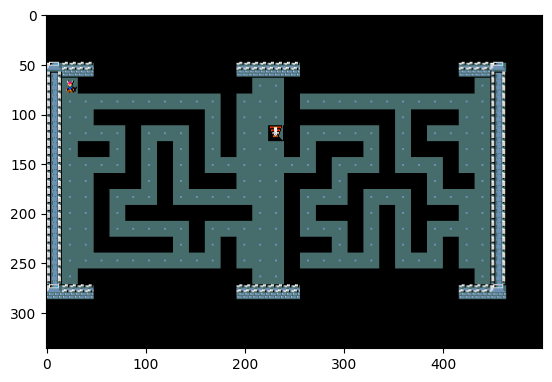

In [ ]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
SEED = 22 
env.seed(SEED)
state = env.reset()

coordinates = [500, 500]

#plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

list_paths = bfs(game_map, start, target)

# Each path is a list of coordinates or states

# path = list_paths[-1]
# Each path is a list of coordinates or states




In [4]:
for idx, path in enumerate(list_paths):
   print(f"Path {idx + 1}: {path}")

Path 1: [(4, 1)]
Path 2: [(4, 1), (5, 1)]
Path 3: [(4, 1), (5, 1), (6, 1)]
Path 4: [(4, 1), (5, 1), (5, 2)]
Path 5: [(4, 1), (5, 1), (6, 1), (7, 1)]
Path 6: [(4, 1), (5, 1), (6, 1), (6, 2)]
Path 7: [(4, 1), (5, 1), (5, 2), (5, 3)]
Path 8: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
Path 9: [(4, 1), (5, 1), (6, 1), (7, 1), (7, 2)]
Path 10: [(4, 1), (5, 1), (5, 2), (5, 3), (5, 4)]
Path 11: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
Path 12: [(4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3)]
Path 13: [(4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
Path 14: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
Path 15: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2)]
Path 16: [(4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4)]
Path 17: [(4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
Path 18: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
Path 19: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2)]
Path 20: [(4, 1), (5, 1), (6, 

KeyboardInterrupt: 

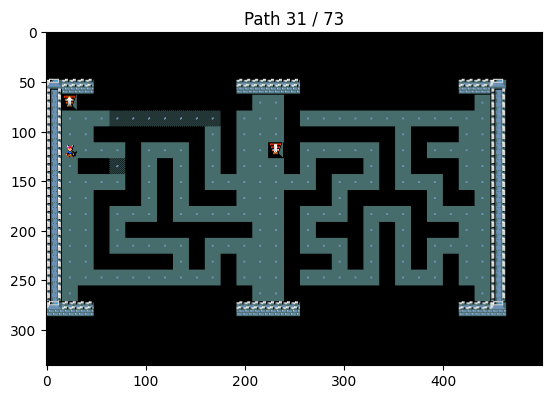

In [5]:
 # Iterate over each path in list_paths
for idx, path in enumerate(list_paths):  # 'idx' will be the index (starting from 0)
    # Set the title to indicate the path number
    plt.title(f"Path {idx + 1} / {len(list_paths)}")  # Index starts from 0, so we add 1 to make it human-readable

    # Reset dell'ambiente per ogni nuovo percorso
    env.seed(SEED)
    state = env.reset()  # Reset dell'ambiente
    game_map = state['chars']
    game = state['pixel']
    game_stats = state['blstats']
    game_mex = state['message']
    
    # Posiziona il giocatore allo start ogni volta
    player_location = get_player_location(game_map)
    target_location = get_target_location(game_map)

    # Convert the path to actions (if necessary)
    actions = actions_from_path(start, path[1:])

    # Visualize the current path
    image = plt.imshow(game[:coordinates[0], :coordinates[1]])
    for action in actions:
        s, _, done, _ = env.step(action)  # `done` tells us if the simulation is over
        image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])

        # If the simulation is over
        if done:
            # Check if the player is dead
            if hp == 0:
                display_game_over()
            else:
                display_victory()
            break  # Stop the simulation for the current path

        # Update the game visualization
        display.display(plt.gcf())
        display.clear_output(wait=True)